In [92]:
import pandas as pd
import numpy as np
   
tourney_df = pd.read_csv("data/datasvm.csv", index_col=0)

In [93]:
tourney_df = tourney_df.fillna(-1000000)

# Choosing Features to Use for Model

# Only execute one of following two cells

Use first cell to use all the features available in the submission file.  After running through notebook once, can look at best features found by random forest and edit this.

In [94]:
systems = ['SAG', 'MOR', 'WLK', 'POM', 'DOL', 'RPI', 'DOK', 'PGH']
teamfList = systems
featureList = []
for f in teamfList:
    featureList.append(f+'0')
    featureList.append(f+'1')
featureList = ['ACU0', 'BBT0', 'BWE0', 'DOK0', 'KPK0', 'MAS0', 'MOR0', 'PGH0', 'PIG0', 'POM0', 'RTP0', 'SAG0', 'TRK0', 'TRP0', 'WIL0', 'DII0', 'BIH0', 'WLK0', '7OT0', 'BUR0', 'DOL0', 'NOL0', 'SFX0', 'BOB0', 'COL0', 'CRO0', 'EBP0', 'MSX0', 'RTR0', 'SP0', 'TPR0', 'BLS0', 'CNG0', 'RTH0', 'SPR0', 'WOL0', 'DCI0', 'KRA0', 'LMC0', 'REW0', 'SEL0', 'SPW0', 'WOB0', 'ARG0', 'DC0', 'STH0', 'RPI0', 'HKB0', 'ACU1', 'BBT1', 'BWE1', 'DOK1', 'KPK1', 'MAS1', 'MOR1', 'PGH1', 'PIG1', 'POM1', 'RTP1', 'SAG1', 'TRK1', 'TRP1', 'WIL1', 'DII1', 'BIH1', 'WLK1', '7OT1', 'BUR1', 'DOL1', 'NOL1', 'SFX1', 'BOB1', 'COL1', 'CRO1', 'EBP1', 'MSX1', 'RTR1', 'SP1', 'TPR1', 'BLS1', 'CNG1', 'RTH1', 'SPR1', 'WOL1', 'DCI1', 'KRA1', 'LMC1', 'REW1', 'SEL1', 'SPW1', 'WOB1', 'ARG1', 'DC1', 'STH1', 'RPI1', 'HKB1', 'tourneylike']

In [95]:
print(featureList)

['ACU0', 'BBT0', 'BWE0', 'DOK0', 'KPK0', 'MAS0', 'MOR0', 'PGH0', 'PIG0', 'POM0', 'RTP0', 'SAG0', 'TRK0', 'TRP0', 'WIL0', 'DII0', 'BIH0', 'WLK0', '7OT0', 'BUR0', 'DOL0', 'NOL0', 'SFX0', 'BOB0', 'COL0', 'CRO0', 'EBP0', 'MSX0', 'RTR0', 'SP0', 'TPR0', 'BLS0', 'CNG0', 'RTH0', 'SPR0', 'WOL0', 'DCI0', 'KRA0', 'LMC0', 'REW0', 'SEL0', 'SPW0', 'WOB0', 'ARG0', 'DC0', 'STH0', 'RPI0', 'HKB0', 'ACU1', 'BBT1', 'BWE1', 'DOK1', 'KPK1', 'MAS1', 'MOR1', 'PGH1', 'PIG1', 'POM1', 'RTP1', 'SAG1', 'TRK1', 'TRP1', 'WIL1', 'DII1', 'BIH1', 'WLK1', '7OT1', 'BUR1', 'DOL1', 'NOL1', 'SFX1', 'BOB1', 'COL1', 'CRO1', 'EBP1', 'MSX1', 'RTR1', 'SP1', 'TPR1', 'BLS1', 'CNG1', 'RTH1', 'SPR1', 'WOL1', 'DCI1', 'KRA1', 'LMC1', 'REW1', 'SEL1', 'SPW1', 'WOB1', 'ARG1', 'DC1', 'STH1', 'RPI1', 'HKB1', 'tourneylike']


In [96]:
y = tourney_df['team0Win'].values # results
X = tourney_df[featureList].values # features

In [98]:
testyears = [2012,2013,2014,2015]
mask = tourney_df['Season'] == testyears[0]
for yr in testyears[1:]:
    mask = mask | (tourney_df['Season'] == yr)
mask = mask & (tourney_df['TourneyGame'] == 1)
tourney_df[mask].shape

(268, 277)

In [99]:
df_test = tourney_df[mask]
df_train = tourney_df[np.logical_not(mask)]

In [100]:
y_train = df_train['team0Win'].values # results
X_train = df_train[featureList].values # features
y_test = df_test['team0Win'].values # results
X_test = df_test[featureList].values # features

# Train our model!

In [101]:
size=X_train.shape[0] #Number of training examples to use
X_train_sample = X_train[0:size]
y_train_sample = y_train[0:size]

In [103]:
from sklearn import svm
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
  
cv_s = StratifiedShuffleSplit(y_train_sample,  n_iter=10 , test_size=0.1, random_state=42)
rfc = RandomForestClassifier(max_features= 'auto' ,n_estimators=50) 
param_grid = { 
        'n_estimators': [1000],
        'max_features': ['sqrt']}
CV_rfc = GridSearchCV(n_jobs=-1, estimator=rfc, scoring="log_loss", param_grid=param_grid, cv=cv_s)
CV_rfc.fit(X_train_sample, y_train_sample)

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(

GridSearchCV(cv=StratifiedShuffleSplit(labels=[0 0 ..., 1 0], n_iter=10, test_size=0.1, random_state=42),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000], 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [104]:
print("The best parameters are {%s} with a score of %0.4f" % (CV_rfc.best_params_, CV_rfc.best_score_))

The best parameters are {{'n_estimators': 1000, 'max_features': 'sqrt'}} with a score of -0.5872


In [105]:
model = CV_rfc.best_estimator_
y_pred = model.predict_proba(X_test) # probability that team0 wins (what Kaggle calls team 1, and wants for submission)
from sklearn import metrics
test_score = metrics.log_loss(y_test, y_pred)
print("Log loss is {0}".format(test_score))

Log loss is 0.5776264925658652


In [89]:
metrics.accuracy_score(y_test, model.predict(X_test))

0.68656716417910446

In [29]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [30]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], tourney_df[featureList].columns[indices[f]],importances[indices[f]]))

Feature ranking:
1. feature 7 POM1 (0.072302)
2. feature 10 RPI0 (0.069910)
3. feature 4 WLK0 (0.067345)
4. feature 6 POM0 (0.066720)
5. feature 5 WLK1 (0.064850)
6. feature 0 SAG0 (0.064251)
7. feature 12 DOK0 (0.063912)
8. feature 13 DOK1 (0.063283)
9. feature 3 MOR1 (0.063236)
10. feature 2 MOR0 (0.062223)
11. feature 11 RPI1 (0.060458)
12. feature 1 SAG1 (0.060014)
13. feature 9 DOL1 (0.059860)
14. feature 8 DOL0 (0.056782)
15. feature 14 PGH0 (0.052667)
16. feature 15 PGH1 (0.052187)


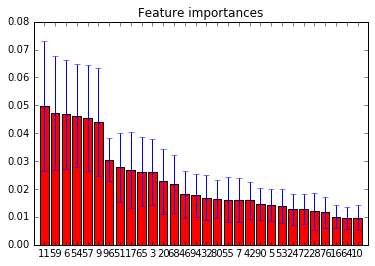

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

maxval = Nfeatures
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1])[:maxval], importances[indices][:maxval],
       color="r", yerr=std[indices][:maxval], align="center")
plt.xticks(range(X.shape[1])[:maxval], indices)
plt.xlim([-1, maxval])
plt.show()

# Write Submission

In [106]:
def write_submission_file(model, featureList, submission_output_file): # see submission.ipynb for details
    import pandas as pd
    sample_df = pd.read_csv('data/2016SampleSubmissionWithFeatures.csv', index_col=0)
    Xsample = sample_df[featureList].values
    sample_df['Pred'] = model.predict_proba(Xsample)[:,1] # predict_proba returns [prob label is 0, prob label is 1], kaggle wants 2nd column
    submission = sample_df[['Id', 'Pred']]
    submission.to_csv(submission_output_file, encoding='ascii', index=False)
submission_output_file = "data/submissionRF6000.csv"
write_submission_file(model, featureList, submission_output_file)

In [107]:
submission_df = pd.read_csv(submission_output_file, index_col=0)
submission_df.head()

,Pred
Id,
2016_1112_1114,0.648
2016_1112_1122,0.780
2016_1112_1124,0.658
2016_1112_1138,0.773
2016_1112_1139,0.690
